# Neurális háló tesztelése

Generált adathalmazon próbáltam ki egy, csakis teljesen összekapcsolt (dense) rétegekből álló neurális hálót.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# saját osztályok/függények importálása
from src.layers.dense import DenseLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc
from src.utils import generate_batches
from src.metrics import accuracy_categ_ce

## Adathalmaz generálása

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

N_SAMPLES = 2000
N_CLASSES = 6
N_FEATURES = 2
TEST_SIZE = 0.2

X, y = make_blobs(n_samples=N_SAMPLES, n_features=N_FEATURES, centers=N_CLASSES, cluster_std=1.2, random_state=96)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=96)

y_test = one_hot_enc(y_test)
y_train = one_hot_enc(y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 2) (1600, 6)
(400, 2) (400, 6)


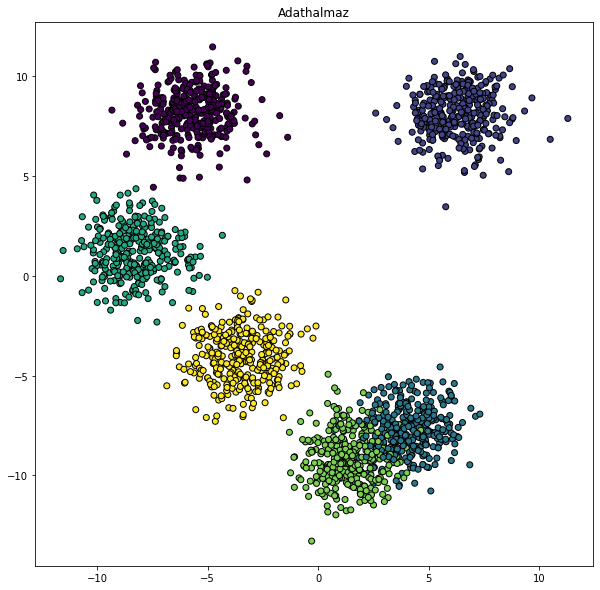

In [3]:
# Adathalmaz vizializációja
plt.figure(figsize=(10,10))
plt.title("Adathalmaz")
plt.scatter(X[:,0], X[:,1], c=y.ravel(), edgecolors='black')
plt.show()

In [4]:
layers = [
    DenseLayer(nodes_prev=N_FEATURES,  nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=N_CLASSES, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent,
    costfn="CCE"
)

In [5]:
hist = model.fit(X_train, y_train, epoch=10, lr=0.001, batch_size=1)

Iteration: 1	 cost: 1.76249	accuracy: 17.00%
Iteration: 2	 cost: 1.64110	accuracy: 50.31%
Iteration: 3	 cost: 1.13495	accuracy: 50.56%
Iteration: 4	 cost: 0.73415	accuracy: 74.69%
Iteration: 5	 cost: 0.32887	accuracy: 82.94%
Iteration: 6	 cost: 0.19709	accuracy: 92.06%
Iteration: 7	 cost: 0.12873	accuracy: 95.69%
Iteration: 8	 cost: 0.11808	accuracy: 96.00%
Iteration: 9	 cost: 0.11537	accuracy: 96.12%
Iteration: 10	 cost: 0.11306	accuracy: 96.31%


In [6]:
accuracy_categ_ce(y=y_test, y_hat=model.predict(X_test))

0.96

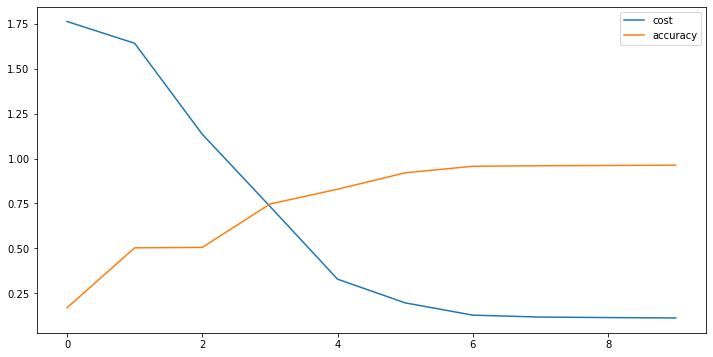

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()